In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import uniform
# import random as rand
# from scipy.stats import norm

# $\alpha$-stable distribution

In [2]:
def stable(alpha, beta, gamma, delta, n):
    Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
    W = np.random.exponential(1, n)
    theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
    if alpha != 1:
        Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
        X = gamma * Z + delta
    else:
        Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
        X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
    return X

# Levy processes

In [3]:
def simulate_process(Z, n, delta):
    X = [0]
    for k in range(n-1):
        X.append(X[k] + Z[k])
    return X

## Brownian motion

In [4]:
n = 1000 
delta = 0.5

In [5]:
Z_br = np.random.normal(0, delta, n)
X_br = simulate_process(Z_br, n, delta)

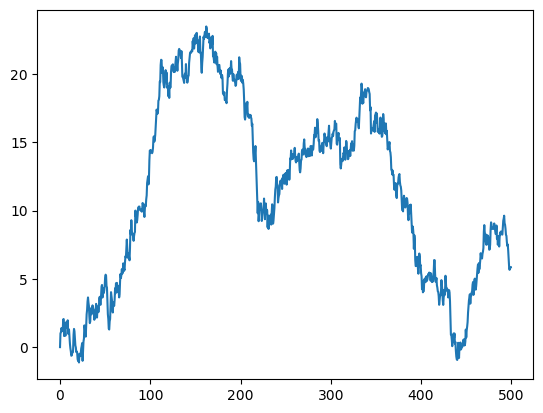

In [6]:
t_br = [k * delta for k in range(n)]
plt.plot(t_br, X_br)

In [7]:
X_br[1]

1.0177491376499384

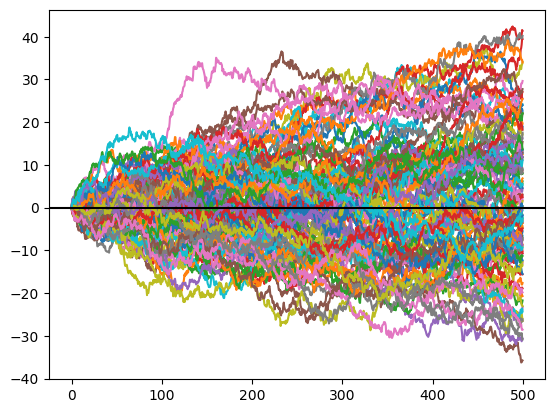

In [26]:
N = 100
X_br = []
for i in range(N):
    Z_br = np.random.normal(0, delta, n)
    X_br.append(simulate_process(Z_br, n, delta))
X_br = np.array(X_br)
t_br = [k * delta for k in range(n)]
plt.plot(t_br, np.transpose(X_br))
plt.axhline(0, color = 'black')
plt.show()

## $\alpha$-stable motion

In [9]:
n = 1000
delta = 0.5

In [10]:
alpha = 1.5
beta = 0
gamma = delta**(1/alpha)
delt = 0
Z_st = stable(alpha, beta, gamma, delt, n)
X_st = simulate_process(Z_st, n, delta)

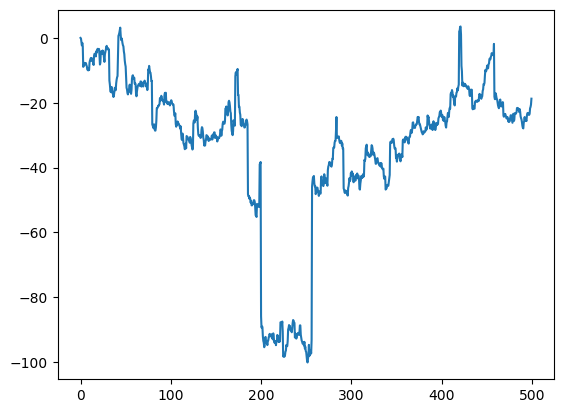

In [11]:
t_st = [k * delta for k in range(n)]
plt.plot(t_st, X_st)

In [12]:
X_st[1]

-0.19576534915626842

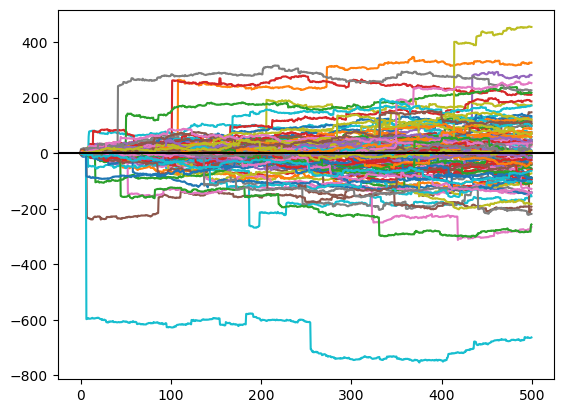

In [27]:
N = 100
X_st = []
alpha = 1.5
beta = 0
gamma = delta**(1/alpha)
delt = 0
for i in range(N):
    Z_st = stable(alpha, beta, gamma, delt, n)
    X_st.append(simulate_process(Z_st, n, delta))
X_st = np.array(X_st)
t_st = [k * delta for k in range(n)]
plt.plot(t_st, np.transpose(X_st))
plt.axhline(0, color = 'black')
plt.show()

# Mean square displacment

In [51]:
def ea_msd(X, tau):
    return np.mean((X[:, tau] - X[:, 0])**2)

In [126]:
def ta_msd(X, tau, k):
    X_k = X[k - 1]
    n = len(X_k)
    msd = 0
    for i in range(n - tau):
        msd += (X_k[i + tau] - X_k[i])**2
    return msd / (n + 1 - tau)

In [53]:
def ea_ta_msd(X, tau):
    N = len(X)
    ta_msd = [ta_msd(X, tau, k) for k in range(N)]
    return np.mean(ta_msd)

In [64]:
n = 1000
delta = 0.5
N = 100
t_br = [k * delta for k in range(n)]
tau = list(range(n))

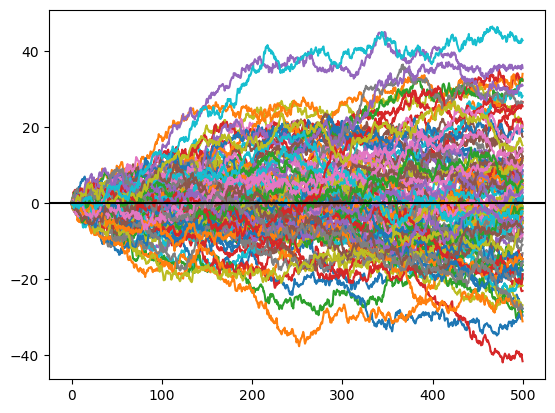

In [55]:
X_br = []
for i in range(N):
    Z_br = np.random.normal(0, delta, n)
    X_br.append(simulate_process(Z_br, n, delta))
X_br = np.array(X_br)
plt.plot(t_br, np.transpose(X_br))
plt.axhline(0, color = 'black')
plt.show()

In [69]:
ea_msd_br = [ea_msd(X_br, t) for t in tau]

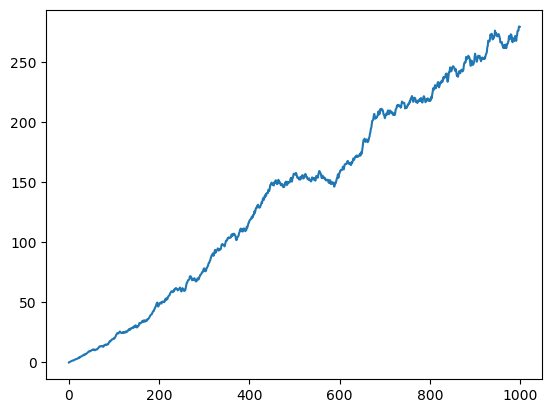

In [72]:
plt.plot(tau, ea_msd_br)
plt.show()

In [109]:
n = 20
N = 10
tau = list(range(n))
X_br = []
for i in range(N):
    Z_br = np.random.normal(0, delta, n)
    X_br.append(simulate_process(Z_br, n, delta))
X_br = np.array(X_br)

In [127]:
k = np.array(range(N)) + 1
ta_msd_br = []
for t in tau:
    msd = []
    for i in k:
        msd.append((ta_msd(X_br, t, i)))
    ta_msd_br.append(msd)

In [111]:
np.shape(ta_msd_br)

(20, 10)

In [114]:
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [119]:
tau

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [124]:
np.transpose(ta_msd_br)[19]

<class 'IndexError'>: index 19 is out of bounds for axis 0 with size 10

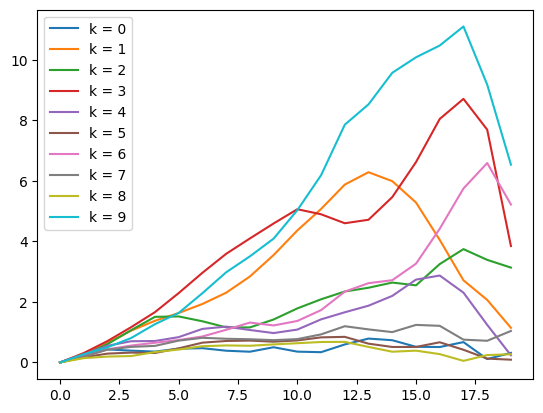

In [128]:
for i in range(N):
    plt.plot(tau, np.transpose(ta_msd_br)[i], label = f"k = {i}")
plt.legend()
plt.show()

In [ ]:
X_k = X_br[k - 1]
n = len(X_k)
msd = 0
for i in range(n - tau):
    msd += (X_k[i + tau] - X_k[i])**2

In [ ]:
ea_ta_msd(X, tau)

In [129]:
ea_ta_msd_br = [ea_ta_msd(X_br, t) for t in tau]

<class 'NameError'>: cannot access free variable 'ta_msd' where it is not associated with a value in enclosing scope

In [ ]:
plt.plot(tau, ea_msd_br)
plt.show()

In [75]:
tau[-1]

999

In [ ]:
X_st = []
alpha = 1.5
beta = 0
gamma = delta**(1/alpha)
delt = 0
for i in range(N):
    Z_st = stable(alpha, beta, gamma, delt, n)
    X_st.append(simulate_process(Z_st, n, delta))
X_st = np.array(X_st)
plt.plot(t_st, np.transpose(X_st))
plt.axhline(0, color = 'black')
plt.show()